# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import warnings
warnings.filterwarnings('ignore')

C:\Users\krist\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

Hay una diferencia mínima entre el promedio de alquiler de bicicletas en un día hábil y un día no hábil.

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

La franja con mayor concentración está comprendida entre 5 y 6 de la tarde. Sin embargo a las 7 de la mañana se presenta un cambio en la tendencia aumentando fuertemente el promedio de alquileres de bicicleta. 

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

In [ ]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

In [ ]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

In [ ]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

In [ ]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Con estas gráficas se puede concluir que los picos observados en los datos están dados por los patrones de comportamiento de los usuarios en los días laborales. Mientras que en los días no hábiles la concentración de uso de bicicleta por alquiler se da entre medio día y la primera parte de la tarde. Con esto se podría concluir que la bicicleta es utilizada entre semana para fines de transporte, mientras que los fines de semana para fines de entretenimiento o deporte.

Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [ ]:
linreg = LinearRegression(fit_intercept = False)
y =  bikes[['total']]
X = bikes[['hour','workingday']]

from sklearn.model_selection import train_test_split  
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)  

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(linreg.coef_)

from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


En general, con base en los coeficientes se puede coonlcuir que un aumento en una hora implica un aumento promedio de 13 bicicletas alquiladas y si el día es hábil en promedio hay 39 bicicletas más alquiladas. Con estos resultados se puede concluir que no existe una relación lineal entre las horas y la cantidad de bicicletas, por lo que los coeficientes llevan a hacer conclusiones erradas sobre los datos. Dado esto, no es recomendable utilizar el modelo de regresión lineal. 

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [ ]:
for hour in range(0, 23):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()

    print(hour,(((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)


In [ ]:
for day in range(0, 2):
    bikes['pred'] = bikes.loc[bikes.workingday<day, 'total'].mean()
    bikes.loc[bikes.workingday>=day, 'pred'] = bikes.loc[bikes.workingday>=day, 'total'].mean()

    print(hour,(((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

Al evaluar el error en por ambas variables, se observa que el menor error está dado en la hora, específicamente en la hora 7. Luego, la primera división se hace sobre la variable 'hour'.

In [ ]:
hour = 7
bikes['pred'] = bikes.loc[bikes.hour<hour, 'pred'].mean()
bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
bikes_izq = bikes.loc[bikes.hour<7].copy()
bikes_der = bikes.loc[bikes.hour>=7].copy()

Se definen las funciones para evaluación de los errores como criterio de selección.

In [ ]:
def error_dia(bikes, day):
    bikes['pred'] = bikes.loc[bikes.workingday<day, 'total'].mean()
    bikes.loc[bikes.workingday>=day, 'pred'] = bikes.loc[bikes.workingday>=day, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

def error_hora(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)
    

La primera rama a ser evaluada es la izquierda, esto es, cuando la hora es menor a 7.

In [ ]:
for hour in bikes_izq.hour.unique():
    print('Hora ', hour)
    error_hora(bikes_izq, hour)

In [ ]:
for day in bikes_izq.workingday.unique():
    error_dia(bikes_izq, day)

Nuevamente el menor error se encuentra en las horas, para la hora 6. Por lo anterior se realizan nuevamente dos ramificaciones.

In [ ]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.hour<6].copy()
bikes_izq_der= bikes_izq.loc[bikes_izq.hour>=6].copy()

for day in bikes_izq_izq.workingday.unique():
    error_dia(bikes_izq_izq, day)

In [ ]:
for hora in bikes_izq_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq, hora)

Al evaluar las funciones de error para amabas variables, nuevamente se define dividir los datos por hora en este caso la hora 2.

In [ ]:
bikes_izq_izq_izq = bikes_izq_izq.loc[bikes_izq_izq.hour<2].copy()
bikes_izq_izq_der= bikes_izq_izq.loc[bikes_izq_izq.hour>=2].copy()

for day in bikes_izq_izq_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_izq_izq_izq, day)
    
for hora in bikes_izq_izq_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_izq, hora)

Ahora, para los datos de menor con hor menor a 2, se divide por la variable workingday puesto que es la que arroja menor valor de error. 

In [ ]:
bikes_izq_izq_izq_izq = bikes_izq_izq_izq.loc[bikes_izq_izq_izq.workingday==0].copy()
bikes_izq_izq_izq_der = bikes_izq_izq_izq.loc[bikes_izq_izq_izq.workingday==1].copy()
    
for hora in bikes_izq_izq_izq_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_izq_izq, hora)


Con este paso finaliza esta rama pues ya no es posible dividir más nodos. Para el workingday 0 se llega a hora 0 y 1. 

In [ ]:
for hora in bikes_izq_izq_izq_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_izq_der, hora)

En el caso de workingday igual a 1, se divide también por hora llegando a hora 0 y 1 como las hojas pues no es posible continuar la ramificación. 

Ahora, continúa el proceso para el nodo en el que las horas con mayor o igual 2.

In [ ]:
for day in bikes_izq_izq_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_izq_izq_der, day)
    
for hora in bikes_izq_izq_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_der, hora)

De acuerdo con los resultados de los errores, se procede a dividir el nodo por el día.

In [ ]:
bikes_izq_izq_der_izq = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==0].copy()
bikes_izq_izq_der_der = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==1].copy()

for hora in bikes_izq_izq_der_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_der_izq, hora)

Dado que el día ya está establecido, solamente se evalúa el error de las horas, arrojando que se debe dividir por la hora 3. Esto arroja un nodo final que es el caso de las horas menores a 3 pues queda comprendido solamente la hora 2. Mientras que por las horas mayores a 3 se realiza nuevamente la división. 

In [ ]:
bikes_izq_izq_der_izq_izq = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour<3].copy()
bikes_izq_izq_der_izq_der = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour>=3].copy()
    
for hora in bikes_izq_izq_der_izq_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_der_izq_der, hora)


Los nuevos nodos se construyen con base en la hora 4, arrojando un nodo final que es la hora 3 y un nodo con las horas mayores a 4, allí se decide detener el proceso.

In [ ]:
bikes_izq_izq_der_izq_der_izq = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour<4].copy()
bikes_izq_izq_der_izq_der_der = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour>=4].copy()

Ahora se evalúa el nodo en el que el workingday es igual a 1.

In [ ]:
for hora in bikes_izq_izq_der_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_der_der, hora)

Como el día ya está establecido, solamente se evalúa la hora, lo que arroja que se debe hacer una división en la hora 5.

In [ ]:
bikes_izq_izq_der_der_izq = bikes_izq_izq_der_der.loc[bikes_izq_izq_der_der.hour<5].copy()
bikes_izq_izq_der_der_der = bikes_izq_izq_der_der.loc[bikes_izq_izq_der_der.hour>=5].copy()

for hora in bikes_izq_izq_der_der_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_izq_izq_der_der_izq, hora)

En el caso de los menores a cinco, se realiza una división de los que la hora es menor a 3 o mayor o igual a 4. Aquí se decide terminar este nodo.

In [ ]:
bikes_izq_izq_der_der_izq_izq = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour<3].copy()
bikes_izq_izq_der_der_izq_der = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour>=3].copy()

Para el nodo en el que la hora es mayor o igual a 5 no se continúa la rafimifación pues es un nodo final. Luego, continúa el proceso con el nodo de las horas mayores a 6. En este caso solo está comprendida una hora, por lo que se divide, si es el caso, por workingday.

In [ ]:
bikes_izq_der= bikes_izq.loc[bikes_izq.hour>=6].copy()

for day in bikes_izq_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_izq_der, day)
    
bikes_izq_der_izq= bikes_izq_der.loc[bikes_izq_der.workingday==0].copy()
bikes_izq_der_der= bikes_izq_der.loc[bikes_izq_der.workingday==1].copy()

Aquí se inicia el proceso para la rama derecha, en la que las horas eran mayor o igual a 7.

In [ ]:
for day in bikes_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der, day)
    
for hora in bikes_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der, hora)

La primera división se realiza por la hora 21.

In [ ]:
bikes_der_izq= bikes_der.loc[bikes_der.hour<21].copy()
bikes_der_der= bikes_der.loc[bikes_der.hour>=21].copy()

for day in bikes_der_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq, day)
    
for hora in bikes_der_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq, hora)

Nuevamente se debe realizar una división por hora, en este caso por la hora 16.

In [ ]:
bikes_der_izq_izq= bikes_der_izq.loc[bikes_der_izq.hour<16].copy()
bikes_der_izq_der= bikes_der_izq.loc[bikes_der_izq.hour>=16].copy()

for day in bikes_der_izq_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_izq, day)
    
for hora in bikes_der_izq_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_izq, hora)
    

Ahora la división se realiza para la hora 9 pues genera el menor error.

In [ ]:
bikes_der_izq_izq_izq= bikes_der_izq_izq.loc[bikes_der_izq_izq.hour<9].copy()
bikes_der_izq_izq_der= bikes_der_izq_izq.loc[bikes_der_izq_izq.hour>=9].copy()

for day in bikes_der_izq_izq_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_izq_izq, day)
    
for hora in bikes_der_izq_izq_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_izq_izq, hora)
    

La división se realiza ahora por día, y se decide finalizar el proceso con este nodo.

In [ ]:
bikes_der_izq_izq_izq_izq= bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==0].copy()
bikes_der_izq_izq_izq_der= bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==1].copy()

Se evalúa ahora para las horas mayores a 9, cuál debería ser la siguiente división.

In [ ]:
for day in bikes_der_izq_izq_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_izq_der, day)
    
for hora in bikes_der_izq_izq_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_izq_der, hora)
    

Se observa nuevamente que la división es por día, y aquí se decide detener este proceso.

In [ ]:
bikes_der_izq_izq_der_izq= bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==0].copy()
bikes_der_izq_izq_der_der= bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==1].copy()

Regresando al nodo de las horas mayores a 16 se evalúa con ambos criterios para continuar la ramificación.

In [ ]:
for day in bikes_der_izq_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_der, day)
    
for hora in bikes_der_izq_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_der, hora)

Nuevamente se debe dividir por hora, en este caso por la hora 19.

In [ ]:
bikes_der_izq_der_izq= bikes_der_izq_der.loc[bikes_der_izq_der.hour<19].copy()
bikes_der_izq_der_der= bikes_der_izq_der.loc[bikes_der_izq_der.hour>=19].copy()

for day in bikes_der_izq_der_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_der_izq, day)
    
for hora in bikes_der_izq_der_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_der_izq, hora)

La división se realiza otra vez por hora, en este caso la hora 17, y con ello se decide detener el proceso.

In [ ]:
bikes_der_izq_der_izq_izq= bikes_der_izq_der_izq.loc[bikes_der_izq_der_izq.hour<17].copy()
bikes_der_izq_der_izq_der= bikes_der_izq_der_izq.loc[bikes_der_izq_der_izq.hour>=17].copy()

Se regresa al nodo en el que la hora es mayor o igula a 19.

In [ ]:
for day in bikes_der_izq_der_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_izq_der_der, day)
    
for hora in bikes_der_izq_der_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_izq_der_der, hora)

Aquí la división se hace por hora nuevamente y se da por finalizado el proceso.

In [ ]:
bikes_der_izq_der_der_izq= bikes_der_izq_der_der.loc[bikes_der_izq_der_der.hour<20].copy()
bikes_der_izq_der_der_der= bikes_der_izq_der_der.loc[bikes_der_izq_der_der.hour>=20].copy()

Regresando al nodo en el que las horas son mayores a 21 se analiza los errores para continuar la ramificación.

In [ ]:
#bikes_der_der= bikes_der.loc[bikes_der.hour>=21].copy()

for day in bikes_der_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_der, day)
    
for hora in bikes_der_der.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_der, hora)

La siguiente división es entonces por hora, aquellas mayores a 23 y las menores a ella.

In [ ]:
bikes_der_der_izq= bikes_der_der.loc[bikes_der_der.hour<23].copy()
bikes_der_der_der= bikes_der_der.loc[bikes_der_der.hour>=23].copy()

In [ ]:
for day in bikes_der_der_izq.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_der_izq, day)
    
for hora in bikes_der_der_izq.hour.unique():
    print('Hora ',hora)
    error_hora(bikes_der_der_izq, hora)

La división se realiza por hora y arbitrariamente se detiene el proceso en este nodo.

In [ ]:
bikes_der_der_izq_izq= bikes_der_der_izq.loc[bikes_der_der_izq.hour<22].copy()
bikes_der_der_izq_der= bikes_der_der_izq.loc[bikes_der_der_izq.hour>=22].copy()

Regresando entonces al nodo en el que la hora es mayor o igual a 23 se realiza la división por día pues no existe más opciones.

In [ ]:
for day in bikes_der_der_der.workingday.unique():
    print('Día ', day)
    error_dia(bikes_der_der_der, day)

In [ ]:
bikes_der_der_der_izq = bikes_der_der_der.loc[bikes_der_der_der.workingday==0].copy()
bikes_der_der_der_der = bikes_der_der_der.loc[bikes_der_der_der.workingday==1].copy()

Con estos últimos nodos se finaliza el proceso de ramificación de todo el árbol.

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.


In [10]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

y =  bikes[['total']]
X = bikes[['hour','workingday']]

import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))


105.19244713068338

In [11]:
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

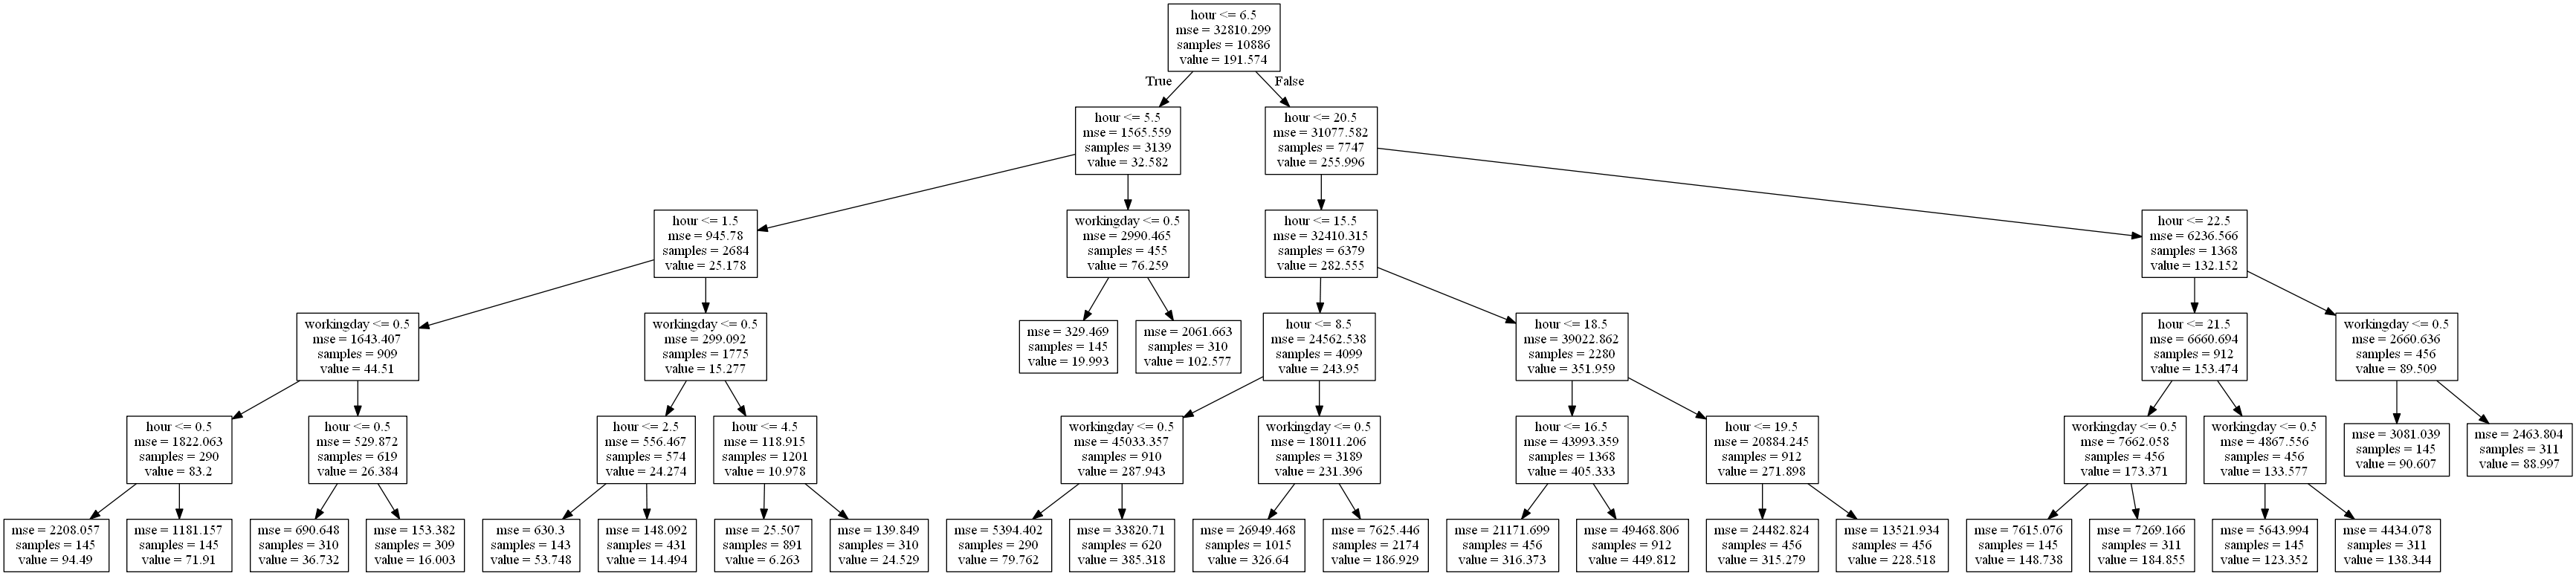

In [12]:
treereg = DecisionTreeRegressor(max_depth = 5 , random_state=1)
treereg.fit(X,y)
dot_data = tree.export_graphviz(treereg, out_file=None,feature_names =X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
